# **Proyecto Final Machine Learning**

## **Contextualización:**

### **Introducción:**

En las últimas décadas, el crecimiento acelerado de las áreas urbanas ha generado cambios significativos en los patrones climáticos locales, dando lugar a la formación de microclimas urbanos. Estos microclimas se caracterizan por variaciones en la temperatura, humedad, velocidad del viento y otros factores meteorológicos, que difieren de las condiciones climáticas de las áreas rurales circundantes. Comprender y clasificar estos microclimas es crucial para la planificación urbana, la gestión de recursos energéticos y la mejora de la calidad de vida de los habitantes.

Además, en un contexto global de transición hacia fuentes de energía renovable, la energía solar se ha posicionado como una de las alternativas más prometedoras. Sin embargo, la eficiencia de los sistemas de captación de energía solar depende en gran medida de las condiciones meteorológicas locales, como la radiación solar, la nubosidad y la temperatura. Por lo tanto, predecir con precisión el potencial de energía solar en diferentes áreas urbanas es fundamental para optimizar la instalación de paneles solares y maximizar su rendimiento.

Este proyecto combina técnicas de machine learning para abordar dos problemas clave:

Clasificación de microclimas urbanos: Identificar y categorizar las variaciones climáticas en diferentes barrios de una ciudad.

Predicción de energía solar potencial: Estimar la cantidad de energía solar que puede ser captada en función de las condiciones meteorológicas.

---

### **Glosario de Variables Climáticas y Meteorológicas**

Este glosario describe las variables utilizadas en el análisis de microclimas y aprovechamiento de energía solar.

#### **Variables Atmosféricas y Meteorológicas**
- **T2M:** MERRA-2 Temperatura a 2 Metros (°C).  
  - Indica la temperatura del aire a una altura de 2 metros sobre la superficie.
- **RH2M:** MERRA-2 Humedad Relativa a 2 Metros (%).  
  - Mide la cantidad de humedad en el aire en relación con la máxima posible a esa temperatura.
- **PRECTOTCORR:** MERRA-2 Precipitación Corregida (mm/hora).  
  - Representa la tasa de precipitación (lluvia, nieve) ajustada según correcciones satelitales.
- **WS10M:** MERRA-2 Velocidad del Viento a 10 Metros (m/s).  
  - Velocidad del viento medida a una altura de 10 metros sobre la superficie.
- **WD10M:** MERRA-2 Dirección del Viento a 10 Metros (Grados).  
  - Indica la dirección desde la que sopla el viento, en grados (0° = Norte, 90° = Este, etc.).
- **PS:** MERRA-2 Presión Superficial (kPa).  
  - Mide la presión atmosférica en la superficie terrestre.

#### **Variables Relacionadas con la Energía Solar**
- **ALLSKY_SFC_UV_INDEX:** CERES SYN1deg Índice UV en Superficie Bajo Cielo Total (W m⁻² × 40).  
  - Mide la intensidad de la radiación ultravioleta en la superficie terrestre.
- **ALLSKY_SFC_SW_DIFF:** CERES SYN1deg Irradiancia Difusa de Onda Corta en Superficie Bajo Cielo Total (Wh/m²).  
  - Cantidad de energía solar dispersada en la atmósfera que llega a la superficie terrestre.
- **ALLSKY_SRF_ALB:** CERES SYN1deg Albedo Superficial Bajo Cielo Total (adimensional).  
  - Fracción de la radiación solar reflejada por la superficie terrestre respecto a la radiación recibida.
- **ALLSKY_KT:** CERES SYN1deg Índice de Claridad de Insolación Bajo Cielo Total (adimensional).  
  - Relación entre la irradiancia solar real y la irradiancia solar máxima teórica en ausencia de atmósfera.

#### **Variables Adicionales**
- **T2MDEW:** MERRA-2 Punto de Rocío/Escarcha a 2 Metros (°C).  
  - Temperatura a la cual el aire debe enfriarse para que el vapor de agua se condense en forma de rocío.
- **T2MWET:** MERRA-2 Temperatura de Bulbo Húmedo a 2 Metros (°C).  
  - Mide la temperatura mínima alcanzable por evaporación de agua en condiciones de enfriamiento adiabático.
- **WS50M:** MERRA-2 Velocidad del Viento a 50 Metros (m/s).  
  - Velocidad del viento medida a 50 metros de altura, relevante para el aprovechamiento eólico.

#### **Variables Geográficas**
- **Loacality:** Localidad donde se tomaron los datos.  
- **NHBD:** Neighborhood, barrio donde se registraron las mediciones.  

Este glosario permite una mejor comprensión de los datos utilizados en el análisis de microclimas y potencial de energía solar.

---


### **Objetivos:**

- **Impacto en la planificación urbana:** La clasificación de microclimas permite identificar áreas con condiciones climáticas extremas (como islas de calor urbanas) y proponer medidas de mitigación, como la creación de espacios verdes o la implementación de techos reflectantes.

- **Optimización de energía renovable:** La predicción de energía solar potencial es esencial para diseñar sistemas de energía solar más eficientes y reducir la dependencia de combustibles fósiles.

- **Contribución científica:** Este proyecto utiliza datos de alta resolución de fuentes como MERRA-2 y CERES SYN1deg, lo que permite un análisis detallado y preciso de las variables meteorológicas. Los resultados están pensados para ser publicados y servir como base para futuras investigaciones.

## **Análisis Exploratorio:**

In [29]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely import wkt
import folium
import networkx as nx

In [30]:
# Read CSV data into a DataFrame
df = pd.read_csv('data.csv')

### **Análisis preliminar:**

In [31]:
df.head()

,YEAR,MO,DY,HR,T2M,PRECTOTCORR,RH2M,WS10M,WD10M,PS,ALLSKY_SFC_UV_INDEX,ALLSKY_SRF_ALB,ALLSKY_SFC_SW_DIFF,T2MDEW,T2MWET,WS50M,ALLSKY_KT,LOCALITY,NBHD
0,2020,1,1,0,26.66,0.03,86.19,7.87,40.0,100.66,0.0,-999.0,0.0,24.19,25.42,10.13,-999.0,Centro,BarrioAbajo
1,2020,1,1,1,26.56,0.03,85.81,8.02,41.8,100.58,0.0,-999.0,0.0,24.01,25.29,10.31,-999.0,Centro,BarrioAbajo
2,2020,1,1,2,26.43,0.02,85.59,8.05,42.7,100.52,0.0,-999.0,0.0,23.84,25.14,10.33,-999.0,Centro,BarrioAbajo
3,2020,1,1,3,26.35,0.00,84.96,8.01,43.7,100.49,0.0,-999.0,0.0,23.63,24.99,10.25,-999.0,Centro,BarrioAbajo
4,2020,1,1,4,26.27,0.00,84.21,7.88,45.6,100.49,0.0,-999.0,0.0,23.42,24.85,10.08,-999.0,Centro,BarrioAbajo


In [32]:
df.shape

(1535519, 19)

In [33]:
# Print the column names
df.columns

Index(['YEAR', 'MO', 'DY', 'HR', 'T2M', 'PRECTOTCORR', 'RH2M', 'WS10M',
       'WD10M', 'PS', 'ALLSKY_SFC_UV_INDEX', 'ALLSKY_SRF_ALB',
       'ALLSKY_SFC_SW_DIFF', 'T2MDEW', 'T2MWET', 'WS50M', 'ALLSKY_KT',
       'LOCALITY', 'NBHD'],
      dtype='object')

<span style='color:skyblue;font-size:1.50rem;font-weight:bold;'>(1)Variables:</span>

- **T2M:** MERRA-2 Temperatura a 2 Metros (°C)
- **RH2M:** MERRA-2 Humedad Relativa a 2 Metros (%)
- **PRECTOTCORR:** MERRA-2 Precipitación Corregida (mm/hora)
- **WS10M:** MERRA-2 Velocidad del Viento a 10 Metros (m/s)
- **WD10M:** MERRA-2 Dirección del Viento a 10 Metros (Grados)
- **PS:** MERRA-2 Presión Superficial (kPa)
- **ALLSKY_SFC_UV_INDEX:** CERES SYN1deg Índice UV en Superficie Bajo Cielo Total (W m-2 x 40)
- **ALLSKY_SFC_SW_DIFF:** CERES SYN1deg Irradiancia Difusa de Onda Corta en Superficie Bajo Cielo Total (Wh/m^2)
- **ALLSKY_SRF_ALB:** CERES SYN1deg Albedo Superficial Bajo Cielo Total (adimensional)
- **T2MDEW:** MERRA-2 Punto de Rocío/Escarcha a 2 Metros (°C)
- **T2MWET:** MERRA-2 Temperatura de Bulbo Húmedo a 2 Metros (°C)
- **WS50M:** MERRA-2 Velocidad del Viento a 50 Metros (m/s)
- **ALLSKY_KT:** CERES SYN1deg Índice de Claridad de Insolación Bajo Cielo Total (adimensional)	
- **Loacality:** Es la localidad
- **NHBD:**	 Neighborhood, es el barrio donde fueron tomados los datos.				


--------

En el análisis de datos  tipo meteorológicos y climáticos, es común encontrar **valores faltantes** que no pueden ser calculados o que están fuera del rango de disponibilidad de las fuentes. Estos valores en este caso han sido representados con un código específico, como **-999**, para indicar su ausencia. En este contexto, se trabajó con un conjunto de <span style="color:skyblue;">**(1)Variables**</span>. Estos mismos, provenientes de fuentes como **MERRA-2** y **CERES SYN1deg**, son fundamentales para estudios climáticos, pero requieren un manejo cuidadoso de los **valores faltantes** para garantizar la precisión y confiabilidad de los análisis.

In [34]:
# Data types of columns
df.dtypes

YEAR                     int64
MO                       int64
DY                       int64
HR                       int64
T2M                    float64
PRECTOTCORR            float64
RH2M                   float64
WS10M                  float64
WD10M                  float64
PS                     float64
ALLSKY_SFC_UV_INDEX    float64
ALLSKY_SRF_ALB         float64
ALLSKY_SFC_SW_DIFF     float64
T2MDEW                 float64
T2MWET                 float64
WS50M                  float64
ALLSKY_KT              float64
LOCALITY                object
NBHD                    object
dtype: object

In [35]:
# Check for null values
print(df.isnull().sum())

YEAR                   0
MO                     0
DY                     0
HR                     0
T2M                    0
PRECTOTCORR            0
RH2M                   0
WS10M                  0
WD10M                  0
PS                     0
ALLSKY_SFC_UV_INDEX    0
ALLSKY_SRF_ALB         0
ALLSKY_SFC_SW_DIFF     0
T2MDEW                 0
T2MWET                 0
WS50M                  0
ALLSKY_KT              0
LOCALITY               0
NBHD                   0
dtype: int64


In [36]:
# Count occurrences of -999 in each column
count_neg_999 = (df == -999).sum()
print("\nCount of -999 values in each column:")
print(count_neg_999)


Count of -999 values in each column:
YEAR                        0
MO                          0
DY                          0
HR                          0
T2M                         0
PRECTOTCORR                 0
RH2M                        0
WS10M                       0
WD10M                       0
PS                          0
ALLSKY_SFC_UV_INDEX    130425
ALLSKY_SRF_ALB         365040
ALLSKY_SFC_SW_DIFF     579409
T2MDEW                      0
T2MWET                      0
WS50M                       0
ALLSKY_KT              814249
LOCALITY                    0
NBHD                        0
dtype: int64


In [37]:
# Seleccionar solo las columnas numéricas para evitar modificar las categóricas
numeric_cols = df.select_dtypes(include=['number']).columns

# Reemplazar -999.0 por NaN SOLO en las columnas numéricas
df_cleaned = df.copy()  # Crear una copia del dataframe original
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].replace(-999.0, np.nan)

# Calcular los datos faltantes sin modificar las columnas de texto
missing_per_col = df_cleaned.isnull().sum() / len(df_cleaned) * 100  # % de valores faltantes por columna

# Calcular porcentaje total de datos faltantes
total_missing = df_cleaned.isnull().sum().sum()
total_values = df_cleaned.size
missing_percentage = (total_missing / total_values) * 100

print("Porcentaje de datos faltantes por variable:\n", missing_per_col)
print("\nPorcentaje total de datos faltantes:", round(missing_percentage, 2), "%")

Porcentaje de datos faltantes por variable:
 YEAR                    0.000000
MO                      0.000000
DY                      0.000000
HR                      0.000000
T2M                     0.000000
PRECTOTCORR             0.000000
RH2M                    0.000000
WS10M                   0.000000
WD10M                   0.000000
PS                      0.000000
ALLSKY_SFC_UV_INDEX     8.493871
ALLSKY_SRF_ALB         23.773070
ALLSKY_SFC_SW_DIFF     37.733756
T2MDEW                  0.000000
T2MWET                  0.000000
WS50M                   0.000000
ALLSKY_KT              53.027608
LOCALITY                0.000000
NBHD                    0.000000
dtype: float64

Porcentaje total de datos faltantes: 6.48 %


El dataset presenta un **6.48%** de datos faltantes en general, pero este porcentaje varía considerablemente entre las variables. Las variables con mayor porcentaje de datos faltantes son:

Variable	Porcentaje de Datos Faltantes
- **ALLSKY_SFC_UV_INDEX**	8.49%
- **ALLSKY_SRF_ALB**	23.77%
- **ALLSKY_SFC_SW_DIFF**	37.73%
- **ALLSKY_KT**	53.03%
Estos valores faltantes están representados con el valor -999, que indica que los datos no pudieron calcularse o están fuera del rango de disponibilidad de las fuentes.

Los porcentajes anteriormente mostrados se pueden visualizar de una mejor manera en las graficas siguientes:

### **Análisis de correlación:**

In [38]:
# Seleccionar solo las columnas numéricas para calcular la correlación
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns

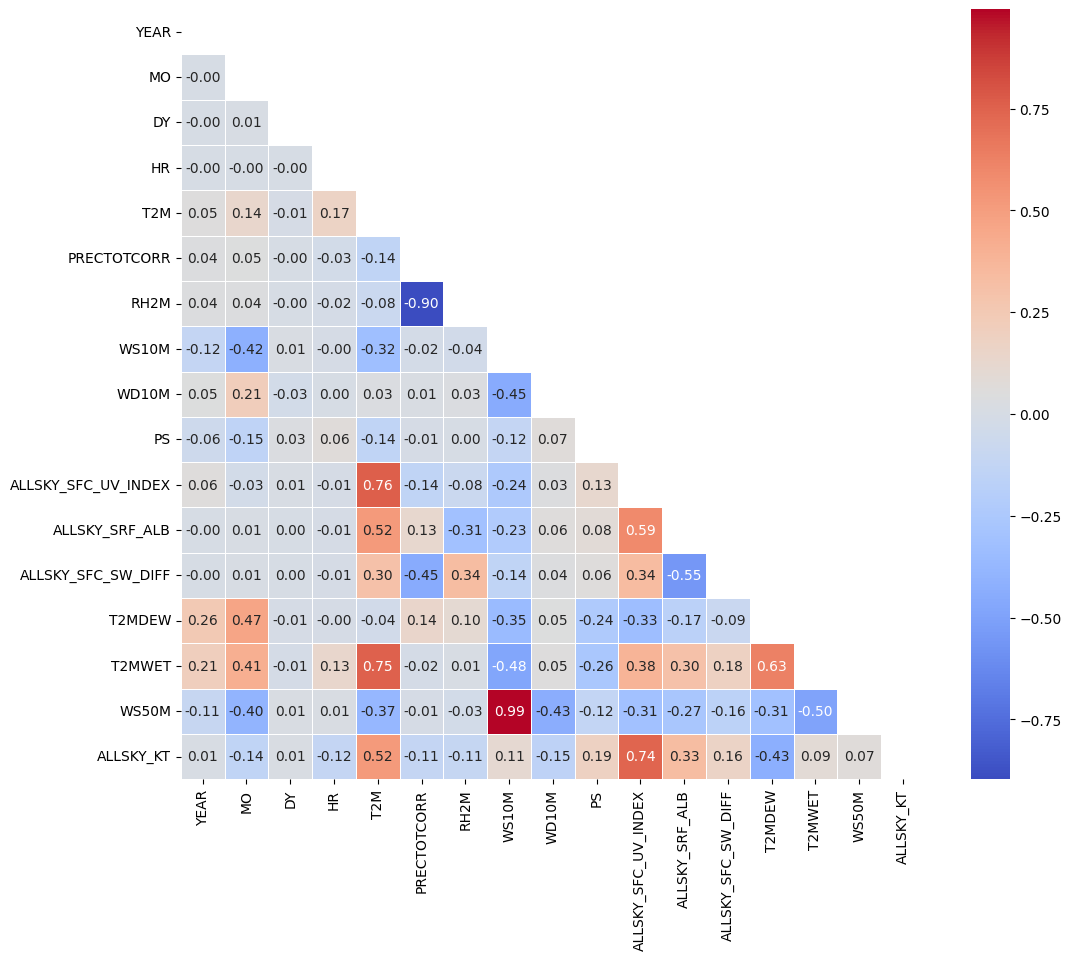

In [39]:
# Calcular la matriz de correlación solo con las columnas numéricas
corr_matrix = df_cleaned[numeric_cols].corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,mask=mask, annot= True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()


#### **Análisis de Correlación entre Variables Climáticas** 

Este análisis busca entender las relaciones entre distintas variables climáticas para apoyar la planificación urbana y la optimización de energía renovable.  

#### **Puntos clave del análisis de correlación:**  

##### 1️. Temperatura y Radiación Solar 
- **T2M (Temperatura a 2m) y ALLSKY_SFC_SW_DIFF (Irradiancia de onda corta difusa)** tienen una fuerte correlación positiva (**~0.73**).  
- Esto indica que temperaturas más altas suelen estar asociadas con una mayor irradiancia solar difusa, lo que es clave para modelos de **energía solar**.  

##### 2️. Humedad y Precipitación 
- **RH2M (Humedad relativa a 2m) y PRECTOTCORR (Precipitación corregida)** presentan una correlación negativa moderada (**~ -0.76**).  
- A mayor precipitación, la humedad relativa disminuye, lo cual puede indicar **cambios abruptos en el clima urbano**.  

##### 3️. Viento y Altura 
- **WS10M (Viento a 10m) y WS50M (Viento a 50m) tienen una correlación de casi 0.99.**  
- Esto sugiere que la velocidad del viento a distintas alturas está altamente relacionada, lo que es útil para evaluar **viabilidad de proyectos eólicos**.  

##### 4️. Presión Superficial y Radiación Solar   
- **ALLSKY_SFC_UV_INDEX (Índice UV) y PS (Presión superficial)** tienen correlación negativa (**~ -0.25**).  
- Puede indicar que a mayor presión, la radiación UV en la superficie tiende a disminuir, lo que podría afectar la **eficiencia de paneles solares**, no obstante la relación entre ambas variables es bastante debil.  



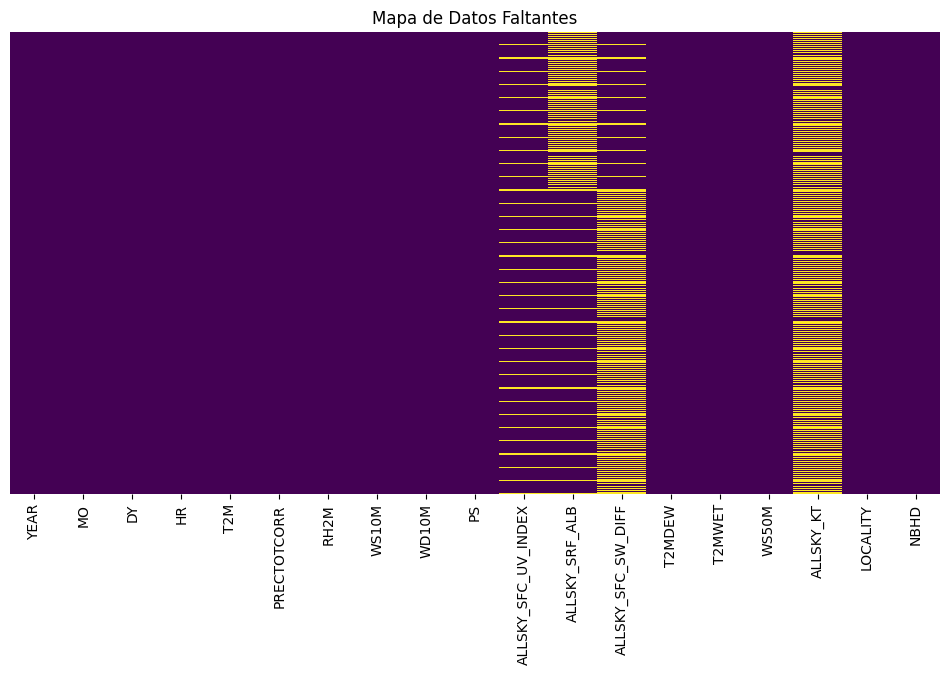

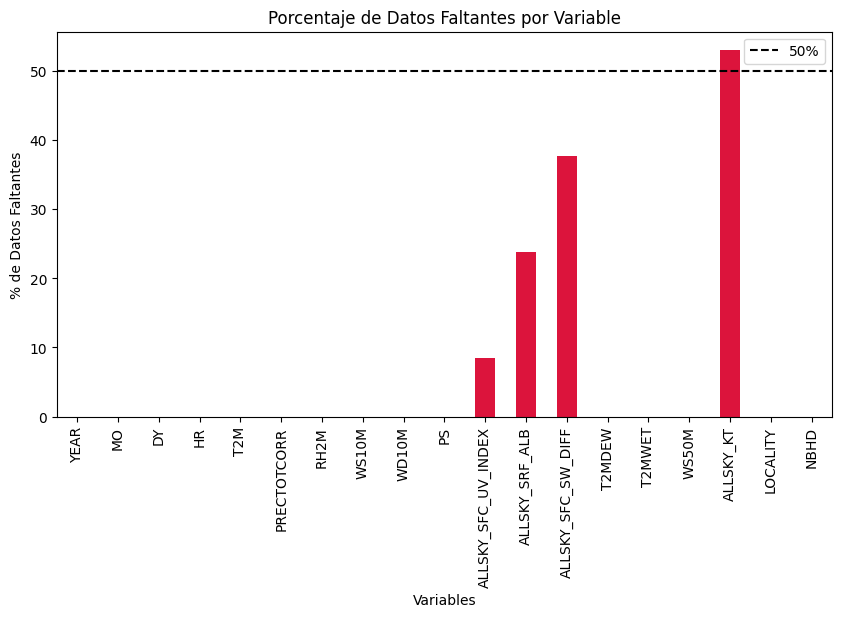

In [40]:
# Visualizar los datos faltantes con un heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_cleaned.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Mapa de Datos Faltantes")
plt.show()

# Visualizar los datos faltantes por variable
plt.figure(figsize=(10, 5))
missing_per_col.plot(kind="bar", color="crimson")
plt.axhline(y=50, color="black", linestyle="--", label="50%")
plt.xlabel("Variables")
plt.ylabel("% de Datos Faltantes")
plt.title("Porcentaje de Datos Faltantes por Variable")
plt.legend()
plt.show()

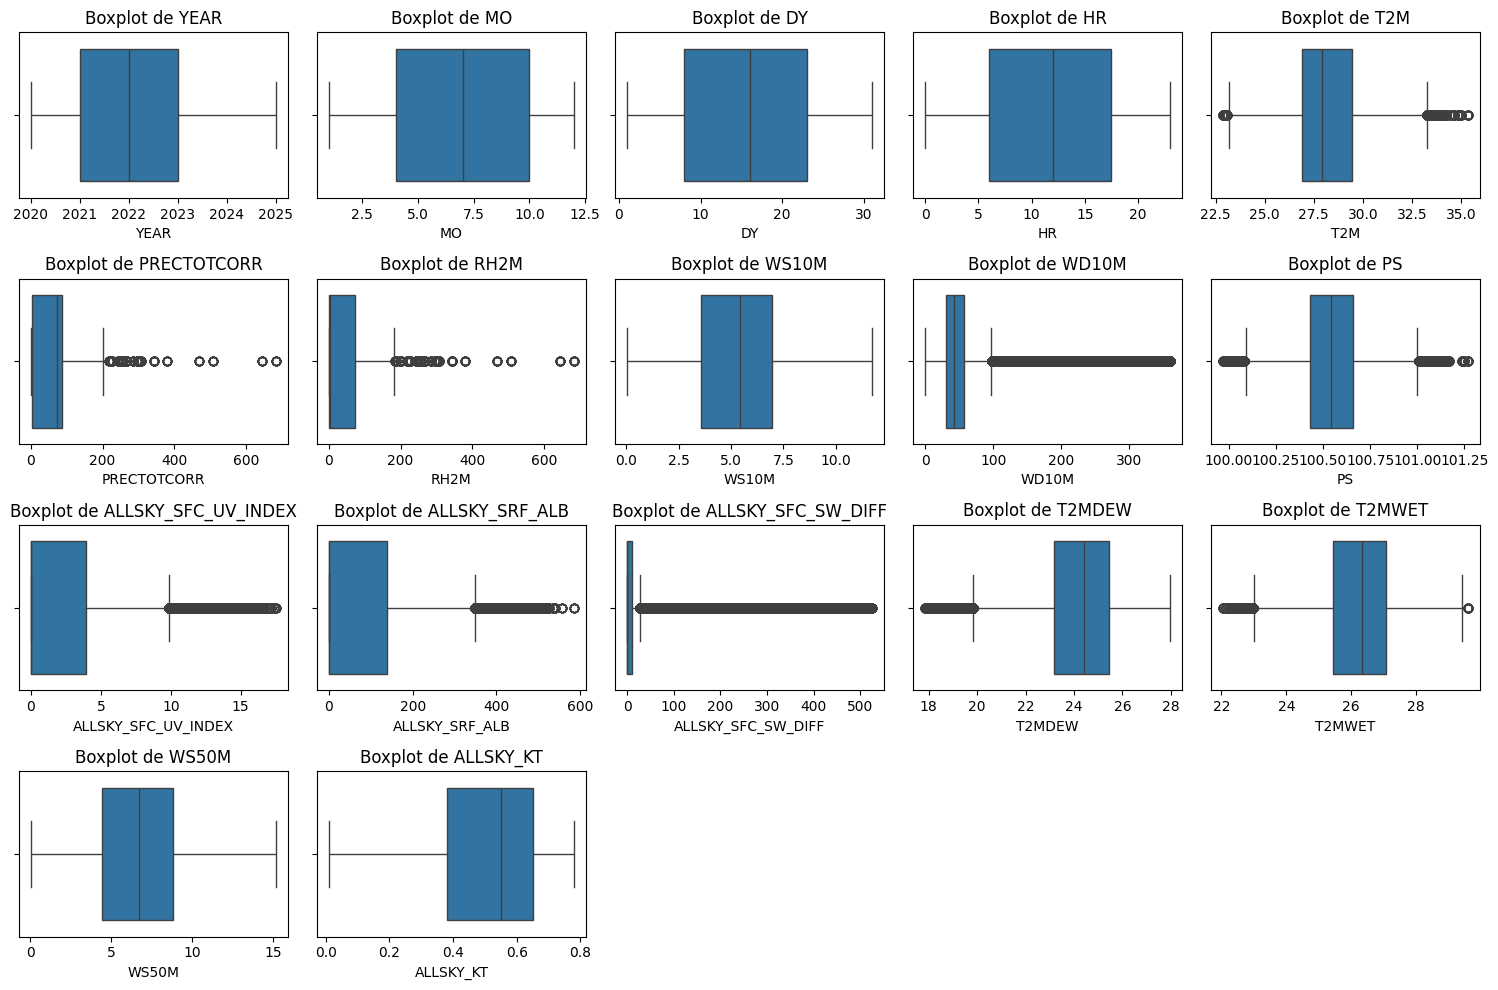

In [41]:
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns

# Crear un boxplot para cada variable numérica
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 5, i)  # Ajusta el número de filas y columnas según la cantidad de variables
    sns.boxplot(data=df_cleaned, x=col)
    plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()

In [42]:
# Get the first 5 rows of the data
df_cleaned.head()

,YEAR,MO,DY,HR,T2M,PRECTOTCORR,RH2M,WS10M,WD10M,PS,ALLSKY_SFC_UV_INDEX,ALLSKY_SRF_ALB,ALLSKY_SFC_SW_DIFF,T2MDEW,T2MWET,WS50M,ALLSKY_KT,LOCALITY,NBHD
0,2020,1,1,0,26.66,0.03,86.19,7.87,40.0,100.66,0.0,NaN,0.0,24.19,25.42,10.13,NaN,Centro,BarrioAbajo
1,2020,1,1,1,26.56,0.03,85.81,8.02,41.8,100.58,0.0,NaN,0.0,24.01,25.29,10.31,NaN,Centro,BarrioAbajo
2,2020,1,1,2,26.43,0.02,85.59,8.05,42.7,100.52,0.0,NaN,0.0,23.84,25.14,10.33,NaN,Centro,BarrioAbajo
3,2020,1,1,3,26.35,0.00,84.96,8.01,43.7,100.49,0.0,NaN,0.0,23.63,24.99,10.25,NaN,Centro,BarrioAbajo
4,2020,1,1,4,26.27,0.00,84.21,7.88,45.6,100.49,0.0,NaN,0.0,23.42,24.85,10.08,NaN,Centro,BarrioAbajo


In [43]:
# Describe the data
round(df_cleaned.describe(),2)

,YEAR,MO,DY,HR,T2M,PRECTOTCORR,RH2M,WS10M,WD10M,PS,ALLSKY_SFC_UV_INDEX,ALLSKY_SRF_ALB,ALLSKY_SFC_SW_DIFF,T2MDEW,T2MWET,WS50M,ALLSKY_KT
count,1535519.00,1535519.00,1535519.00,1535519.00,1535519.00,1535519.00,1535519.00,1535519.00,1535519.00,1535519.00,1405094.00,1170479.00,956110.00,1535519.00,1535519.00,1535519.00,721270.00
mean,2022.00,6.52,15.73,11.50,28.21,53.68,29.63,5.29,66.46,100.55,2.38,72.09,45.04,24.25,26.23,6.64,0.51
std,1.42,3.45,8.81,6.92,1.82,37.99,38.15,2.21,76.95,0.17,3.74,110.75,93.78,1.54,1.17,2.84,0.17
min,2020.00,1.00,1.00,0.00,22.88,0.00,0.00,0.04,0.00,99.97,0.00,0.00,0.00,17.85,22.05,0.04,0.01
25%,2021.00,4.00,8.00,6.00,26.91,2.60,0.09,3.56,30.30,100.43,0.00,0.00,0.02,23.19,25.44,4.44,0.38
50%,2022.00,7.00,16.00,12.00,27.93,71.73,3.13,5.41,42.00,100.54,0.00,0.15,0.13,24.43,26.33,6.73,0.55
75%,2023.00,10.00,23.00,17.50,29.46,86.14,73.71,6.97,57.20,100.66,3.95,139.15,11.10,25.43,27.08,8.79,0.65
max,2025.00,12.00,31.00,23.00,35.36,684.23,684.23,11.72,359.80,101.27,17.52,585.10,525.32,27.97,29.61,15.15,0.78


In [44]:
# Filtrar los barrios que están en la localidad "Estratégico"
barrios_estrategico = df_cleaned[df_cleaned['LOCALITY'] == 'Estratégico']['NBHD'].unique()

# Imprimir los barrios
print("Barrios en la localidad Estratégico:")
for barrio in barrios_estrategico:
    print(barrio)

Barrios en la localidad Estratégico:


In [45]:
# Contar el número de barrios por localidad
barrios_por_localidad = df_cleaned.groupby('LOCALITY')['NBHD'].nunique()

# Imprimir el resultado
print(barrios_por_localidad)

LOCALITY
Centro       7
Norte        7
Occidente    7
Oriente      7
Sur          7
Name: NBHD, dtype: int64


In [46]:
# Añadir los barrios 'ElGolf' y 'SimonBolivar' a la localidad 'Norte'
df.loc[df['NBHD'].isin(['ElGolf', 'SimonBolivar']), 'LOCALITY'] = 'Norte'

# Añadir el barrio 'LasNieves' a la localidad 'Occidente'
df.loc[df['NBHD'] == 'LasNieves', 'LOCALITY'] = 'Occidente'

# Eliminar la localidad 'Estratégico'
df = df[df['LOCALITY'] != 'Estratégico']



# Exportar el DataFrame modificado a un archivo CSV
df.to_csv('data_modified.csv', index=False)

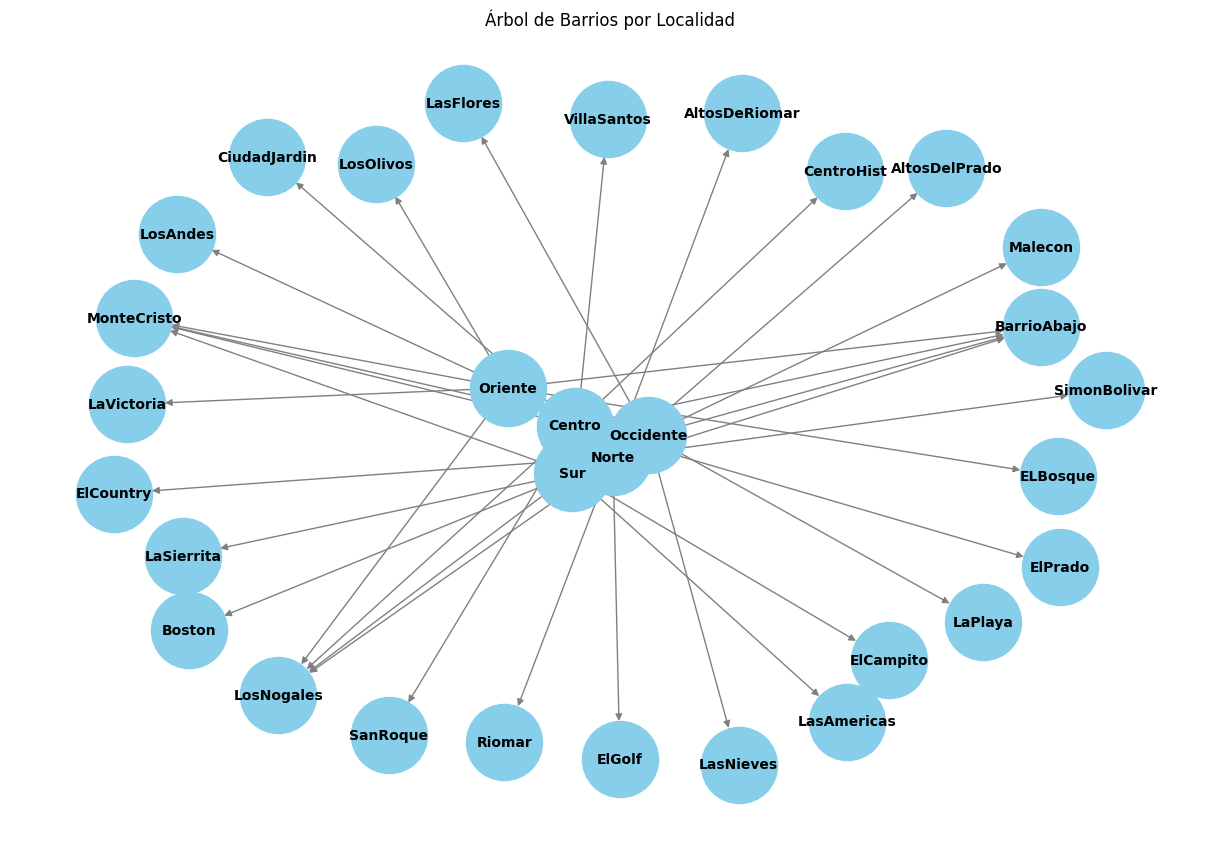

In [47]:
# Crear un grafo vacío
G = nx.DiGraph()

# Añadir nodos y aristas al grafo
for localidad in df_cleaned['LOCALITY'].unique():
    G.add_node(localidad)
    barrios = df_cleaned[df_cleaned['LOCALITY'] == localidad]['NBHD'].unique()
    for barrio in barrios:
        G.add_node(barrio)
        G.add_edge(localidad, barrio)

# Dibujar el grafo
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42, k=0.5)  # Ajustar el parámetro k para espaciar los nodos
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("Árbol de Barrios por Localidad")
plt.show()


### **Análisis visual:**

#### **Análisis visual de Variables implicadas en la generaciónd de microclimas**

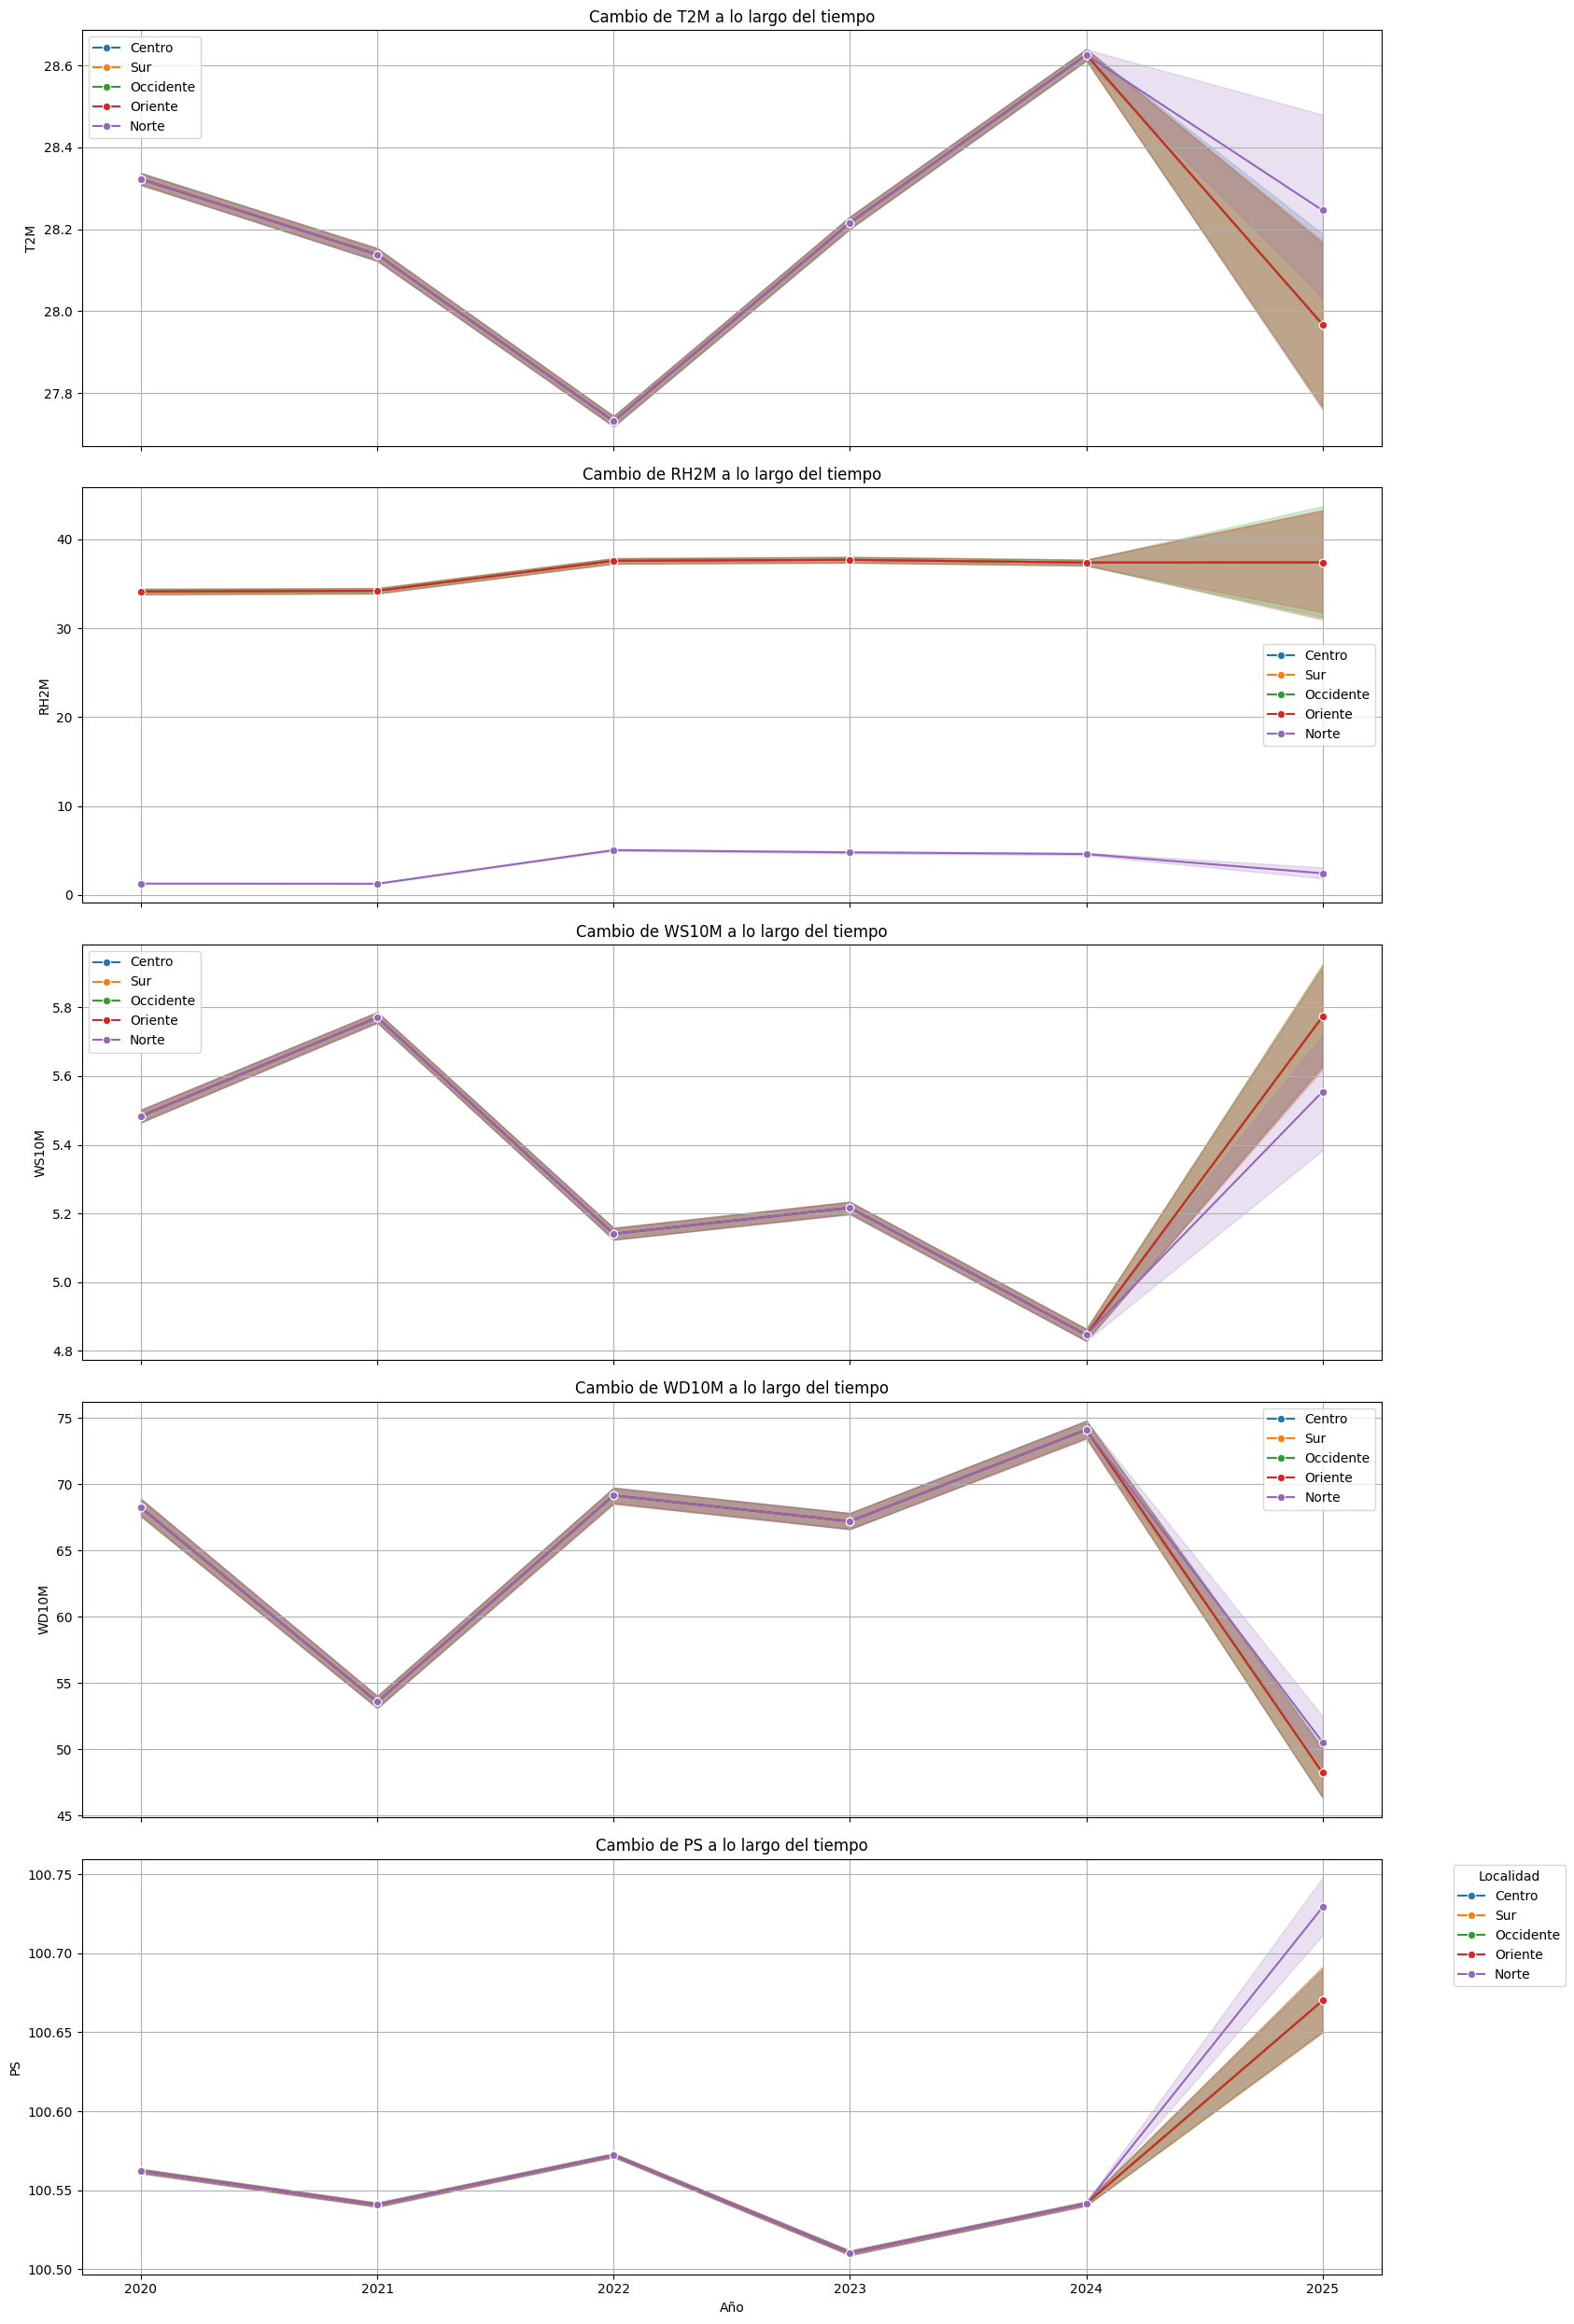

In [48]:
# Definir las variables relacionadas con la generación de microclimas
microclimate_vars = ['T2M', 'RH2M', 'WS10M', 'WD10M', 'PS']

# Obtener las localidades únicas
localidades = df_cleaned['LOCALITY'].unique()

# Crear una figura con subplots
fig, axes = plt.subplots(len(microclimate_vars), 1, figsize=(15, 25), sharex=True)

# Iterar sobre las variables de microclima y crear un gráfico para cada una
for i, var in enumerate(microclimate_vars):
    ax = axes[i]
    for localidad in localidades:
        sns.lineplot(data=df_cleaned[df_cleaned['LOCALITY'] == localidad], x='YEAR', y=var, marker='o', ax=ax, label=localidad)
    ax.set_title(f'Cambio de {var} a lo largo del tiempo')
    ax.set_xlabel('Año')
    ax.set_ylabel(var)
    ax.grid(True)

plt.tight_layout()
plt.legend(title='Localidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### **Análisis de los cambios de variables meteorológicas para el análisis de microclimas a lo largo del tiempo**

El gráfico presenta la evolución de diferentes variables meteorológicas en varias regiones a lo largo del tiempo. Se analizan las siguientes variables:

1. **T2M (Temperatura a 2 metros)**
2. **RH2M (Humedad relativa a 2 metros)**
3. **WS10M (Velocidad del viento a 10 metros)**
4. **WD10M (Dirección del viento a 10 metros)**
5. **PS (Presión atmosférica)**

##### 1. **T2M (Temperatura a 2 metros)**
   - La temperatura muestra una tendencia fluctuante con un descenso entre 2020 y 2022, seguido de un aumento en 2023 y un incremento brusco en 2024.
   - Existe una mayor variabilidad en 2025, con un aumento en la incertidumbre de las mediciones según las bandas de confianza.

##### 2. **RH2M (Humedad relativa a 2 metros)**
   - La humedad relativa tiene una tendencia estable con ligeros aumentos desde 2020 hasta 2023.
   - En 2024, se observa una mayor dispersión en los valores proyectados para 2025.

##### 3. **WS10M (Velocidad del viento a 10 metros)**
   - La velocidad del viento experimenta variaciones significativas a lo largo de los años, con picos en 2021 y 2024.
   - Se observa un incremento brusco en 2025, lo que indica un cambio potencialmente importante en las condiciones meteorológicas, cabe aclarar que este cambio puede tomar valores más bajos a medida que pasa el año, dado que no se poseen datos del 2025 para poder sacar conclusiones.

##### 4. **WD10M (Dirección del viento a 10 metros)**
   - La dirección del viento sigue una tendencia oscilatoria, con mínimos en 2021 y 2023 y picos en 2022 y 2024.
   - En 2025, se observa una mayor variabilidad entre las regiones, lo que indica posibles cambios en los patrones de circulación del viento.

##### 5. **PS (Presión atmosférica)**
   - La presión atmosférica muestra variaciones menores entre 2020 y 2023.
   - En 2024 y 2025, la dispersión aumenta, lo que sugiere mayor incertidumbre en las proyecciones.

##### **Conclusiones Generales**
- Se observa un aumento en la incertidumbre de los datos para 2025, pero esta observación tiene sentido dado que fueron tomados hasta el primero de enero de este año para evitar registros imcompletos.
- La variabilidad de la temperatura, velocidad del viento y presión atmosférica indica posibles cambios en los patrones climáticos en el futuro.
- Es importante monitorear los datos en los próximos años para entender mejor las tendencias meteorológicas y su impacto en la región, no obstante a partir de los datos registrados se pueden notar ciertos patrones, que van más asociados a la climatologia de la región.


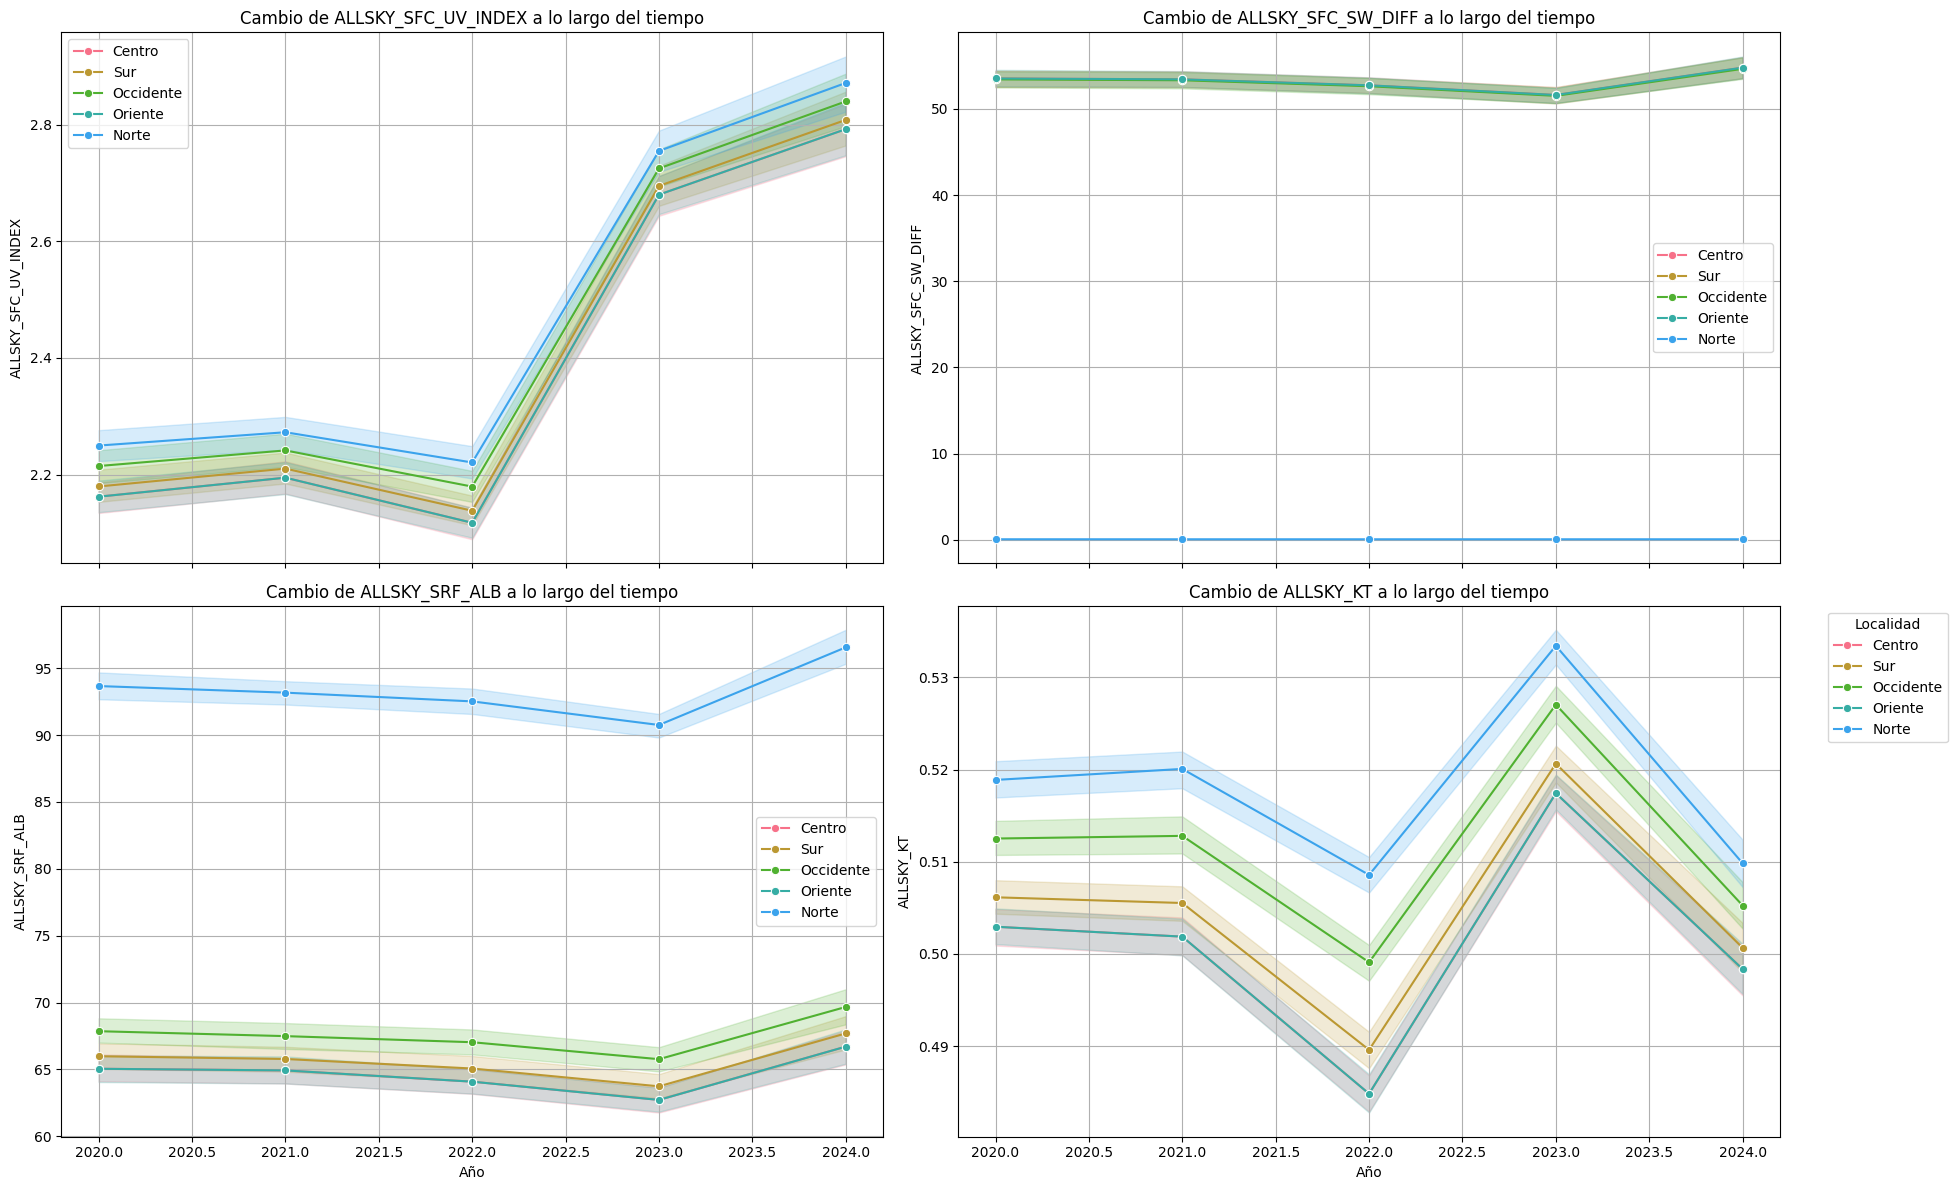

In [50]:
# Definir las variables relacionadas con el aprovechamiento de la energía solar
solar_vars = ['ALLSKY_SFC_UV_INDEX', 'ALLSKY_SFC_SW_DIFF', 'ALLSKY_SRF_ALB', 'ALLSKY_KT']

# Crear una figura con 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharex=True)

# Iterar sobre las variables solares y crear un gráfico para cada una
for i, var in enumerate(solar_vars):
    ax = axes[i//2, i%2]
    for j, localidad in enumerate(localidades):
        sns.lineplot(data=df_cleaned[df_cleaned['LOCALITY'] == localidad], x='YEAR', y=var, marker='o', ax=ax, label=localidad, color=palette[j])
    ax.set_title(f'Cambio de {var} a lo largo del tiempo')
    ax.set_xlabel('Año')
    ax.set_ylabel(var)
    ax.grid(True)

plt.tight_layout()
plt.legend(title='Localidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### **Análisis de Variables Clave para el Aprovechamiento de Energía Solar**

Este análisis se centra en las variables más relevantes para evaluar el potencial de aprovechamiento de la energía solar en distintas localidades a lo largo del tiempo.

##### 1. **ALLSKY_SFC_UV_INDEX (Índice UV en Superficie Bajo Cielo Total)**
- Se observa un aumento general en todas las localidades, con una tendencia similar entre ellas.
- A partir de 2022, hay un incremento notable en los valores, lo que podría indicar una mayor radiación solar disponible para aprovechamiento.
- Las diferencias entre localidades no son muy marcadas, pero el **Norte** y **Occidente** parecen tener valores ligeramente más altos.

##### 2. **ALLSKY_SFC_SW_DIFF (Irradiancia Difusa de Onda Corta en Superficie Bajo Cielo Total)**
- Hay una tendencia a la baja entre 2020 y 2022, seguida de un repunte en 2023.
- **Occidente** tiene valores más altos que el resto de las localidades, lo que sugiere que esta zona recibe más irradiancia difusa.
- La disminución en años anteriores podría estar asociada a condiciones atmosféricas cambiantes, como un aumento de aerosoles o nubosidad.

##### 3. **ALLSKY_SRF_ALB (Albedo Superficial Bajo Cielo Total)**
- En general, los valores se mantienen relativamente estables con ligeras fluctuaciones.
- **Occidente** presenta los valores más altos de albedo, lo que indica una mayor reflectividad en la superficie.
- **Norte** y **Oriente** tienen los valores más bajos, lo que podría significar una mayor absorción de radiación en estas zonas.

##### 4. **ALLSKY_KT (Índice de Claridad de Insolación Bajo Cielo Total)**
- Se observa una tendencia decreciente entre 2020 y 2022, seguida de un aumento en 2023 y una posterior caída.
- Las diferencias entre localidades son más notorias aquí, con **Occidente** y **Norte** presentando valores más altos.
- Este índice es clave para evaluar la fracción de la irradiancia total que es directa y, por tanto, relevante para la eficiencia de los sistemas solares.

##### **Conclusiones generales:**
- Estas variables ayudan a identificar qué zonas tienen mayor potencial para la instalación de paneles solares, considerando no solo la cantidad de radiación recibida, sino también la fracción difusa y la claridad atmosférica.
- Los cambios observados en las tendencias pueden estar influenciados por factores climáticos o atmosféricos que afectan la eficiencia de la energía solar en el tiempo.



#### **Análisis individual de la temperatura promedio por general y por localidad:**

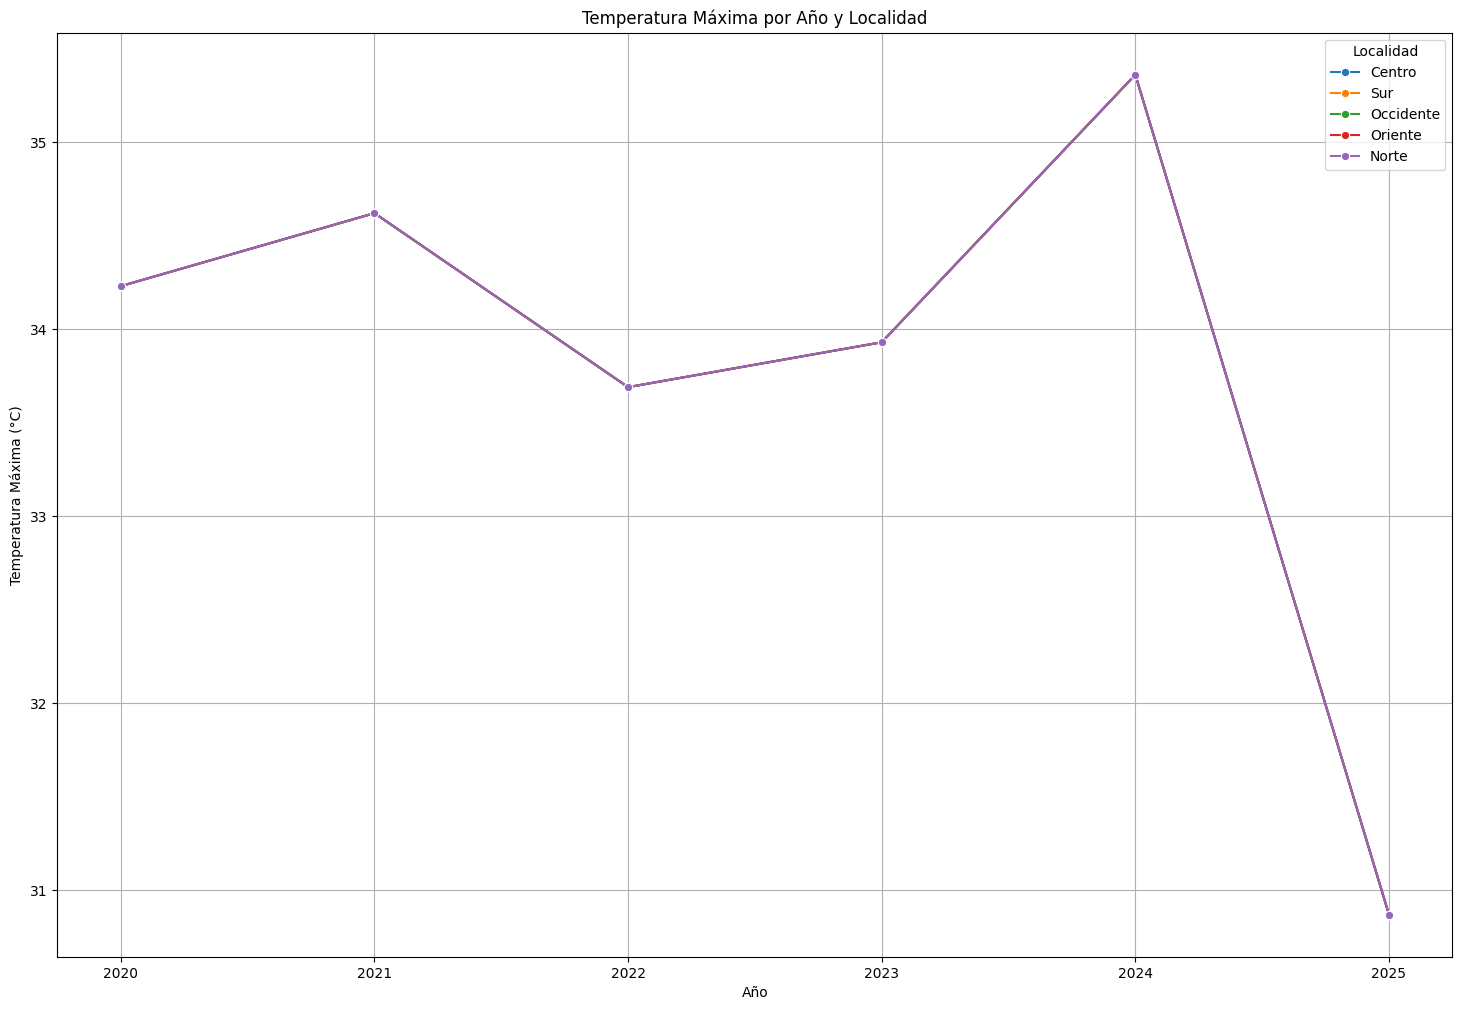

In [53]:
# Calcular la temperatura máxima por año y localidad
max_temp_per_year_locality = df_cleaned.groupby(['YEAR', 'LOCALITY'])['T2M'].max().reset_index()

# Crear una figura para el gráfico de líneas
plt.figure(figsize=(18, 12))

# Iterar sobre las localidades y crear un gráfico de líneas para cada una
for localidad in localidades:
    data = max_temp_per_year_locality[max_temp_per_year_locality['LOCALITY'] == localidad]
    sns.lineplot(data=data, x='YEAR', y='T2M', marker='o', label=localidad)

plt.title('Temperatura Máxima por Año y Localidad')
plt.xlabel('Año')
plt.ylabel('Temperatura Máxima (°C)')
plt.legend(title='Localidad')
plt.grid(True)
plt.show()


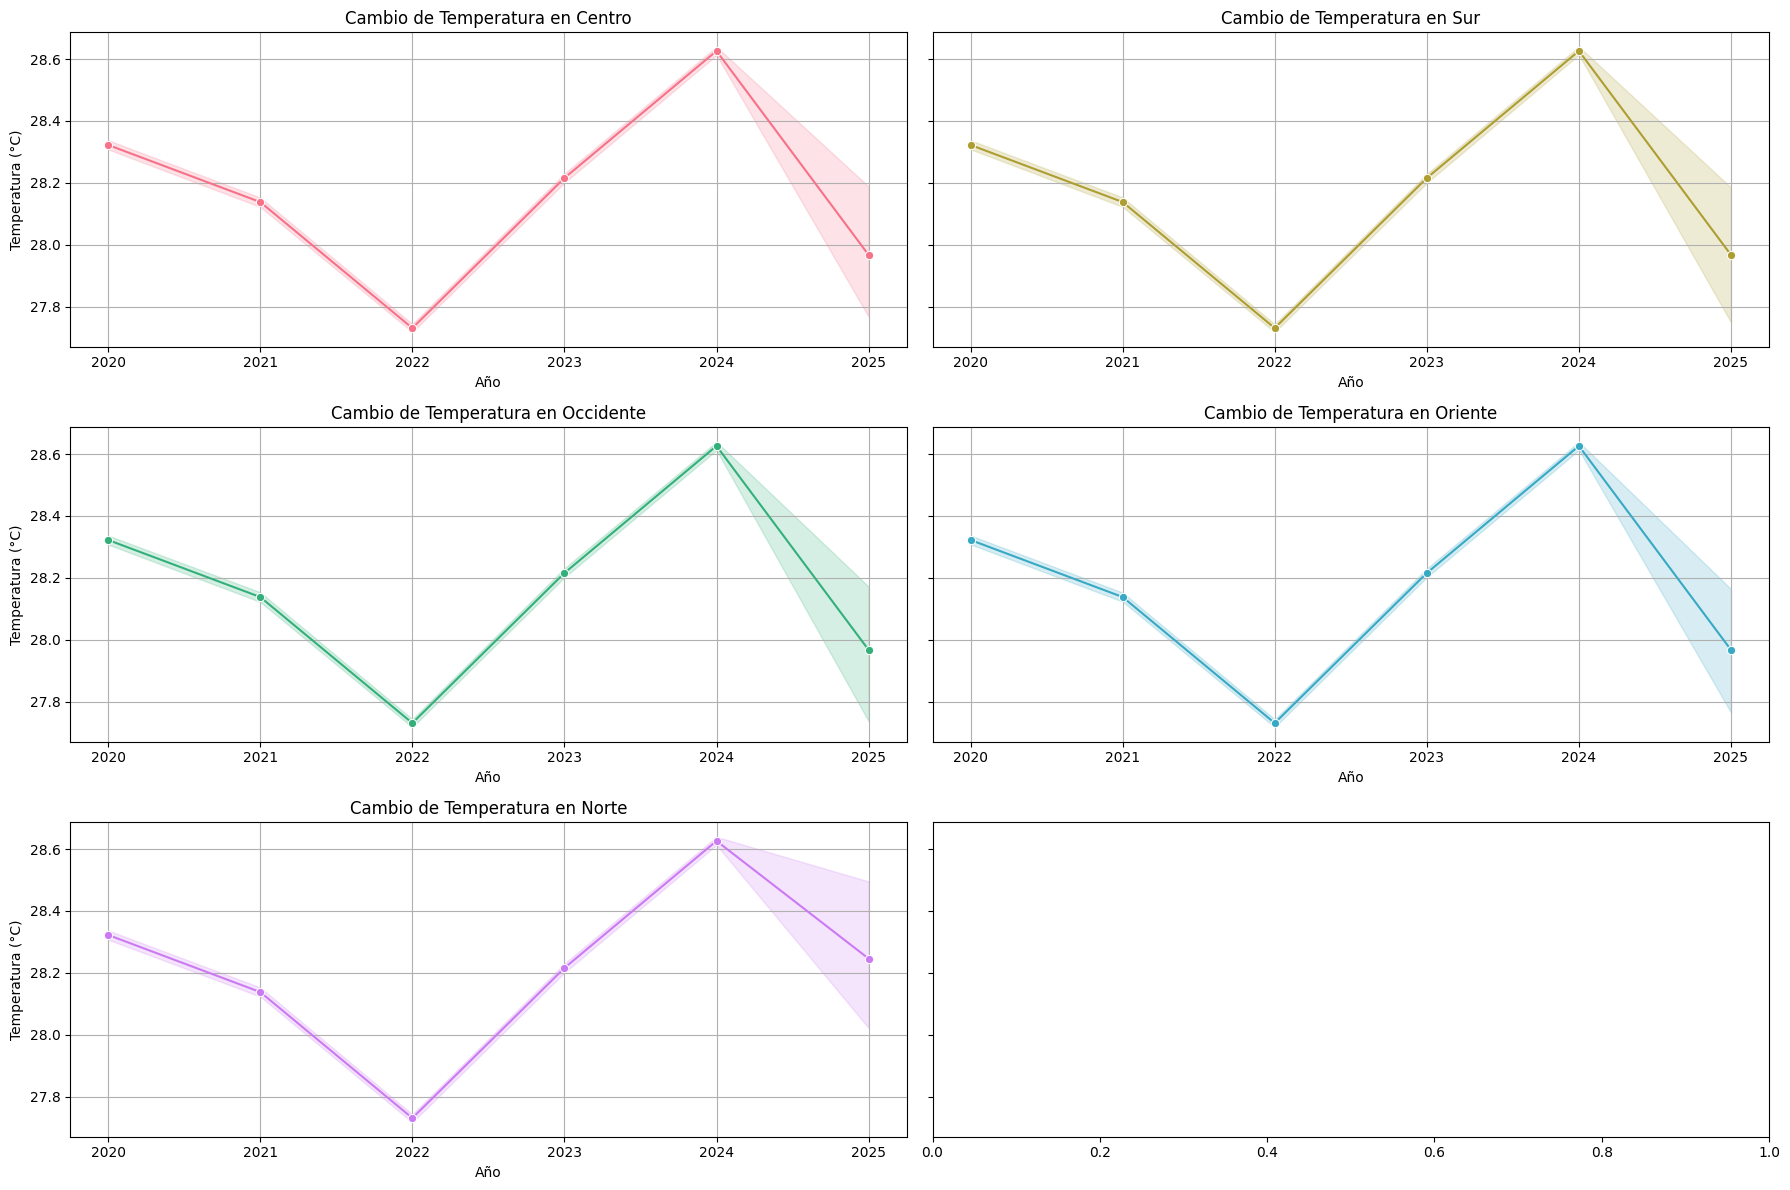

In [54]:
# Obtener las localidades únicas
localidades = df_cleaned['LOCALITY'].unique()

# Crear una figura con 6 subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 12), sharey=True)

# Definir una paleta de colores
palette = sns.color_palette("husl", len(localidades))

# Iterar sobre las localidades y crear un gráfico para cada una
for i, localidad in enumerate(localidades[:6]):
    ax = axes[i//2, i%2]
    sns.lineplot(data=df_cleaned[df_cleaned['LOCALITY'] == localidad], x='YEAR', y='T2M', marker='o', ax=ax, color=palette[i])
    ax.set_title(f'Cambio de Temperatura en {localidad}')
    ax.set_xlabel('Año')
    ax.set_ylabel('Temperatura (°C)')
    ax.grid(True)

plt.tight_layout()
plt.show()

#### **Análisis de Temperatura a lo Largo del Tiempo**

Podemos observar que se muestra un **patrón similar** en los diferentes barrios, lo cual se debe a que se promedia la **temperatura total por año**. Hay varios puntos interesantes a destacar:  

- A partir del **2020**, la temperatura comenzó a **decrecer** de manera constante hasta alcanzar un **mínimo histórico** dentro del rango de tiempo analizado.  
- Sin embargo, desde el **2022**, la temperatura experimenta un **aumento exponencial** hasta el **2024**, alcanzando su punto más alto.  
- Posteriormente, los valores vuelven a **niveles similares a los registrados en 2020**, lo que sugiere una posible estabilización o un ciclo climático recurrente.  

Este comportamiento puede estar influenciado por factores climáticos, urbanos o ambientales que requieren un análisis más detallado.


#### **Visualización Geografica:**

In [ ]:
# Cargar el archivo CSV
df = pd.read_csv('Barrios_de_Barranquilla_seg_n_POT_20250227.csv')

# Convertir la columna 'the_geom' a geometría
df['the_geom'] = df['the_geom'].apply(wkt.loads)

# Crear un GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='the_geom')

# Crear un mapa base
m = folium.Map(location=[10.9639, -74.7964], zoom_start=12)

# Añadir los polígonos al mapa
for idx, row in gdf.iterrows():
    sim_geo = gpd.GeoSeries(row['the_geom']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                          style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(row['NOMBRE']).add_to(geo_j)
    geo_j.add_to(m)

# Guardar el mapa en un archivo HTML
m.save('mapa_barrios_barranquilla.html')

# Mostrar el mapa en el navegador
m

### **Conclusiones EDA:**